<a href="https://colab.research.google.com/github/debi201326/AAI_Practical/blob/main/AAI_prac_1(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practical 1(b): Implementation of Block World Problem using Planning Technique.

Initial State:
A: ['C', 'B']
B: []
C: []




<ipython-input-4-2a16055d4733>:50: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i - 0.4, j), 0.8, 0.8, fill=True, color="lightblue", edgecolor="black"))


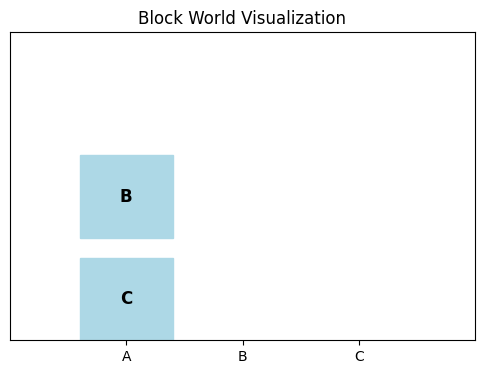

Steps to reach the goal:
Move B from A to B
Move C from A to C
Final State:
A: []
B: ['B']
C: ['C']




<ipython-input-4-2a16055d4733>:50: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((i - 0.4, j), 0.8, 0.8, fill=True, color="lightblue", edgecolor="black"))


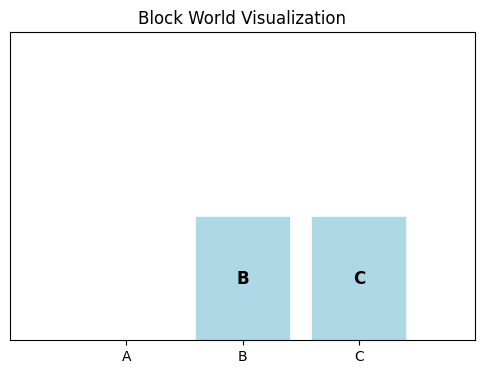

In [ ]:
import matplotlib.pyplot as plt

class BlockWorld:
    def __init__(self, initial_state, goal_state):
        self.state = initial_state
        self.goal = goal_state

    def is_goal_state(self):
        return self.state == self.goal

    def move(self, block, from_pos, to_pos):
        """Move a block from one position to another."""
        if self.state[from_pos] and self.state[from_pos][-1] == block:
            self.state[from_pos].pop()
            self.state[to_pos].append(block)
            return True
        return False

    def plan(self):
        """Simple planning technique to reach the goal state."""
        steps = []
        while not self.is_goal_state():
            for from_pos, stack in self.state.items():
                if stack:  # If there's a block to move
                    block = stack[-1]
                    for to_pos in self.goal:
                        if block in self.goal[to_pos] and block not in self.state[to_pos]:
                            if self.move(block, from_pos, to_pos):
                                steps.append(f"Move {block} from {from_pos} to {to_pos}")
                            break
        return steps

    def display(self):
        for position, blocks in self.state.items():
            print(f"{position}: {blocks}")
        print("\n")

    def visualize(self):
        """Visualize the block world state using Matplotlib."""
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.set_xlim(-1, len(self.state))
        ax.set_ylim(0, max(len(stack) for stack in self.state.values()) + 1)

        ax.set_xticks(range(len(self.state)))
        ax.set_xticklabels(self.state.keys())
        ax.set_yticks([])  # Hide y-axis ticks

        for i, (position, blocks) in enumerate(self.state.items()):
            for j, block in enumerate(blocks):
                ax.add_patch(plt.Rectangle((i - 0.4, j), 0.8, 0.8, fill=True, color="lightblue", edgecolor="black"))
                ax.text(i, j + 0.4, block, ha="center", va="center", fontsize=12, fontweight="bold")

        ax.set_title("Block World Visualization")
        plt.show()

# Define initial and goal states
initial_state = {
    "A": ["C", "B"],
    "B": [],
    "C": []
}

goal_state = {
    "A": [],
    "B": ["B"],
    "C": ["C"]
}

# Run block world planner
block_world = BlockWorld(initial_state, goal_state)
print("Initial State:")
block_world.display()

# Visualize initial state
block_world.visualize()

steps = block_world.plan()

print("Steps to reach the goal:")
for step in steps:
    print(step)

print("Final State:")
block_world.display()

# Visualize final state
block_world.visualize()
